In [113]:
import spacy
import pandas as pd

df=pd.read_csv("./text_processing.csv") 


In [114]:
df=df.apply(lambda x:x.str.lower() if x.dtype== 'object' else x)


In [115]:
import string
cols_to_clean = ['Title', 'Description']
for col in cols_to_clean:
    df[col]=df[col].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)) )
df

,Class Index,Title,Description
0,3,fears for t n pension after talks,unions representing workers at turner newall...
1,4,the race is on second private team sets launch...,spacecom toronto canada a secondteam of rock...
2,4,ky company wins grant to study peptides ap,ap a company founded by a chemistry researche...
3,4,prediction unit helps forecast wildfires ap,ap its barely dawn when mike fitzpatrick star...
4,4,calif aims to limit farmrelated smog ap,ap southern californias smogfighting agency w...
...,...,...,...
7595,1,around the world,ukrainian presidential candidate viktor yushch...
7596,2,void is filled with clement,with the supply of attractive pitching options...
7597,2,martinez leaves bitter,like roger clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in singapore take bext...,singapore doctors in the united states have w...


In [116]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [117]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))



In [118]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    words = text.split()
    filtered=[word for word in words if word.lower() not in stop_words]
    return " ".join(filtered)
cols_to_clean = ['Title', 'Description']
for col in cols_to_clean:
    df[col] = df[col].apply(remove_stop_words)
df


,Class Index,Title,Description
0,3,fears n pension talks,unions representing workers turner newall say ...
1,4,race second private team sets launch date huma...,spacecom toronto canada secondteam rocketeers ...
2,4,ky company wins grant study peptides ap,ap company founded chemistry researcher univer...
3,4,prediction unit helps forecast wildfires ap,ap barely dawn mike fitzpatrick starts shift b...
4,4,calif aims limit farmrelated smog ap,ap southern californias smogfighting agency we...
...,...,...,...
7595,1,around world,ukrainian presidential candidate viktor yushch...
7596,2,void filled clement,supply attractive pitching options dwindling d...
7597,2,martinez leaves bitter,like roger clemens almost exactly eight years ...
7598,3,5 arthritis patients singapore take bextra cel...,singapore doctors united states warned painkil...


In [119]:
import spacy
nlp = spacy.load("en_core_web_sm")
cols_to_clean=["Title","Description"]
for col in cols_to_clean:
   docs = list(nlp.pipe(df[col].astype(str)))  # Ensure column is string 
   df[col] = [" ".join([token.lemma_ for token in doc]) for doc in docs]
 

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
df['combined'] = df["Title"]+''+df['Description']
X = tfidf.fit_transform(df['combined'])
y = df['Class Index']
y




0       3
1       4
2       4
3       4
4       4
       ..
7595    1
7596    2
7597    2
7598    3
7599    3
Name: Class Index, Length: 7600, dtype: int64

In [123]:
import numpy as np

sparsity = (X.nnz / (X.shape[0] * X.shape[1])) * 100
print(f"Sparsity: {sparsity:.2f}%")


Sparsity: 0.36%


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict Model
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

#Accuracy of model
model.score(X_test,y_test)


Accuracy: 0.881578947368421


0.881578947368421

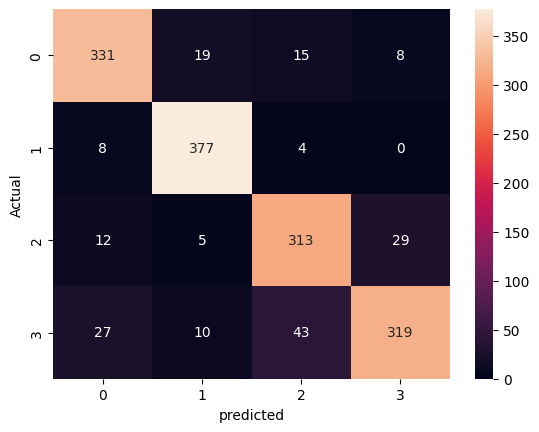

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()



In [126]:
import joblib
joblib.dump(model, "news_classifier_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

# Load later
loaded_model = joblib.load("news_classifier_model.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")
